## Problem Statement
The objective of this model is to predict which users of a financial subscription product are likely to churn based on the patterns recognised in their financial habits through data given. It is helful as the company can focus on re-engaging these users with the product to minimize the churn rate by sending email reminders about the benefits of the product, especially the ones focussing on features that are new or that the user has shown to value.

In [1]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Imporing the dataset
dataset = pd.read_csv('E:/Machine_Learning/Minimizing_Churn_rates_Through_Analysis_of_Financial_Habits/Minimizing-Churn-Data/churn_data.csv') 
# Users who were 60 days enrolled, churn in the next 30

In [2]:
# Exploratory Data Analysis

dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning Data

In [6]:
# Removing NaN

dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
# Removing the rows containing NA for age column
dataset = dataset[pd.notnull(dataset['age'])]

# Since there almost a third of the dataset that doesn't have credit score values and a little over 10% of rows with NA for 
# rewards_earned, we will drop these columns insstead of loosing a majot chunk of data.

dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [9]:
# Features Histograms

dataset2 = dataset.drop(columns = ['user', 'churn'])

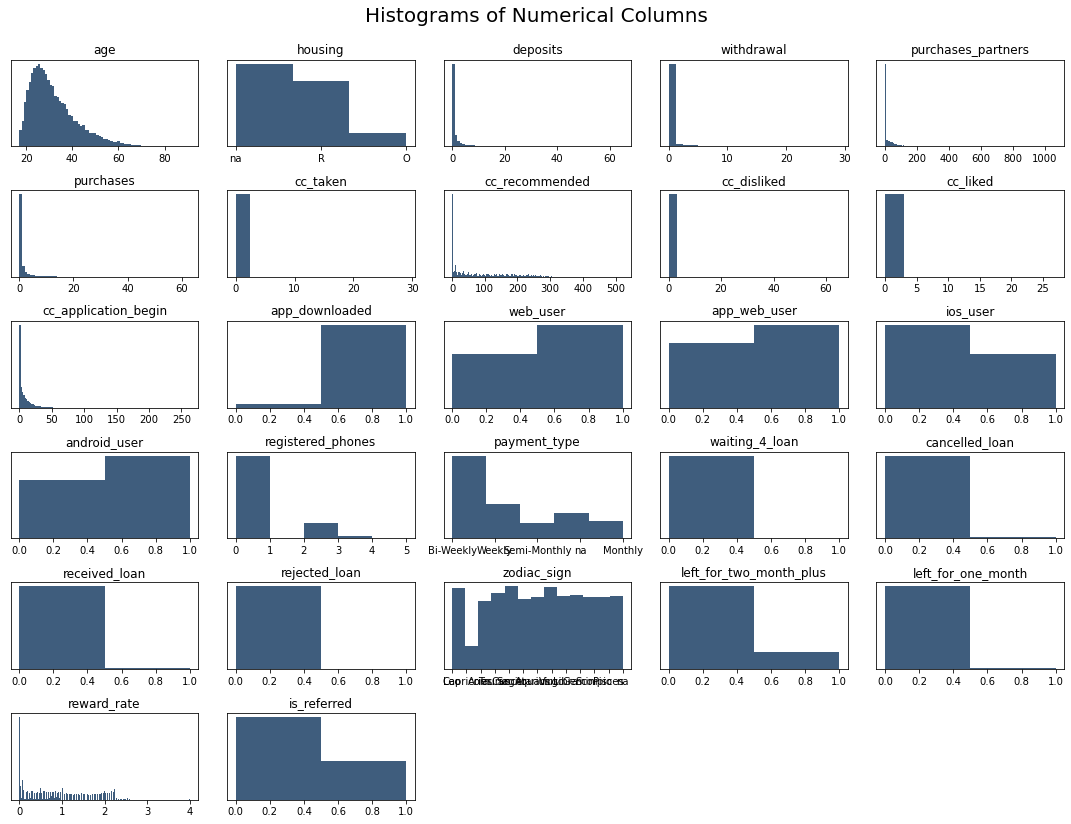

In [10]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


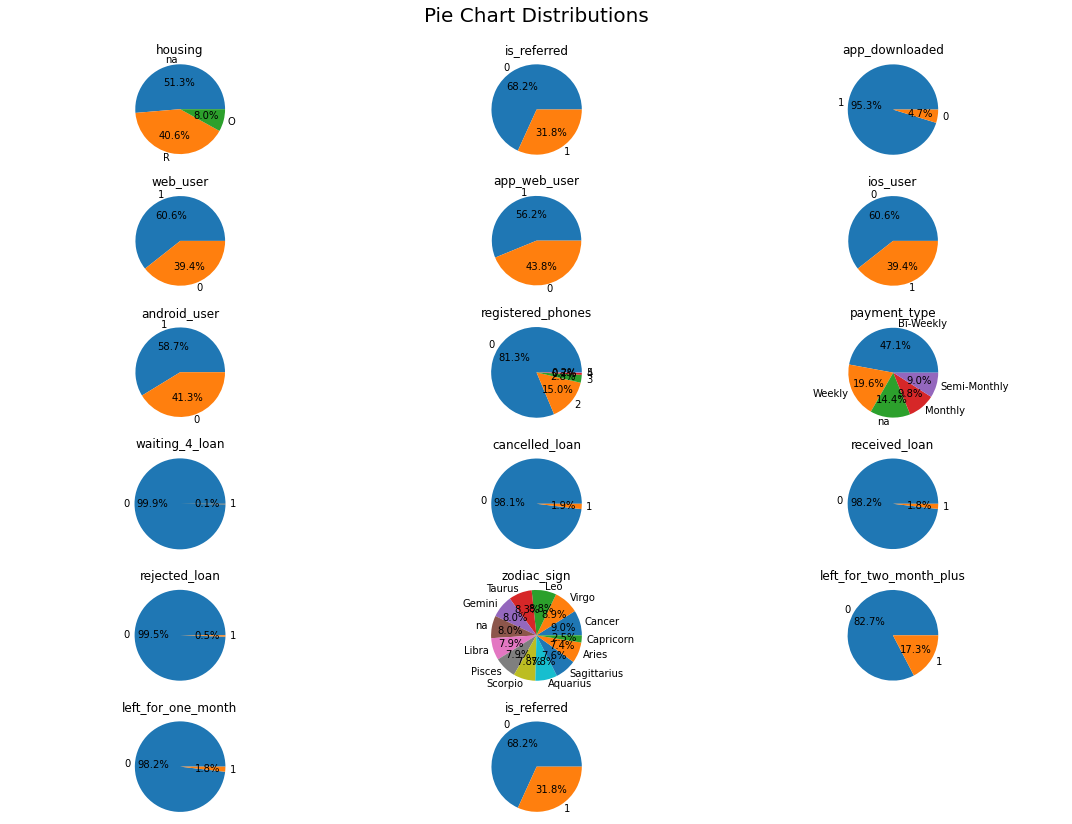

In [12]:
# Pie Chart Distributions
# We are going to dig deeper into the fields with binary/categorical values by plotting them using pie charts. The reason 
# why we are doing this is because we don't want any value of a categorical field to be in too small proportion to contain 
# all possible values for the response

dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i-1].value_counts(normalize=True).values
    index = dataset2.iloc[:, i-1].value_counts(normalize=True).index
    
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [14]:
#Exploring Uneven features

# As we see in the figure above, there are features where the proportion of certain category/value is as low as 0.1%. So, we
# will explore these further to examine whether these correspond to each possible value of response variable or not

dataset[dataset.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [15]:
dataset[dataset.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [16]:
dataset[dataset.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [17]:
dataset[dataset.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [18]:
dataset[dataset.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

After examining the features with uneven distributions , we know that the smaller subset values of these features correspond to both possible values of response variable which is fine. So , we will move forward with the next step in EDA.

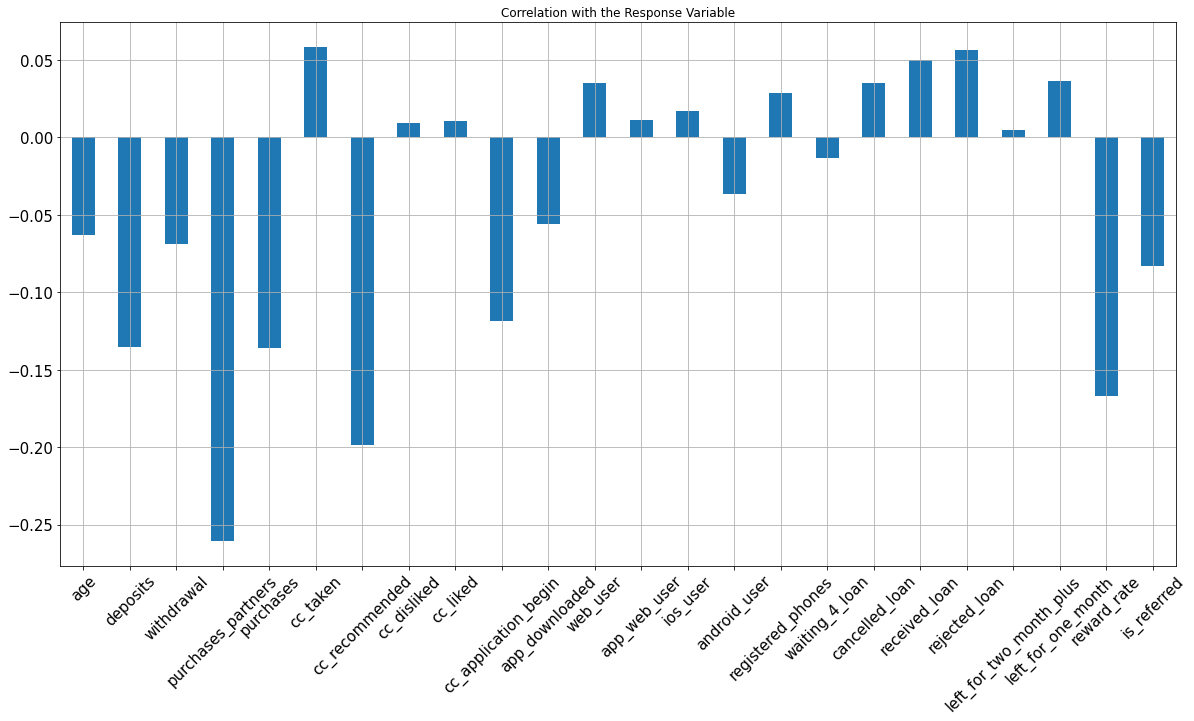

In [19]:
# Correlation Plot

dataset.drop(columns = ['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
                        figsize = (20, 10), title = 'Correlation with the Response Variable', fontsize = 15, rot = 45, 
                        grid= True)

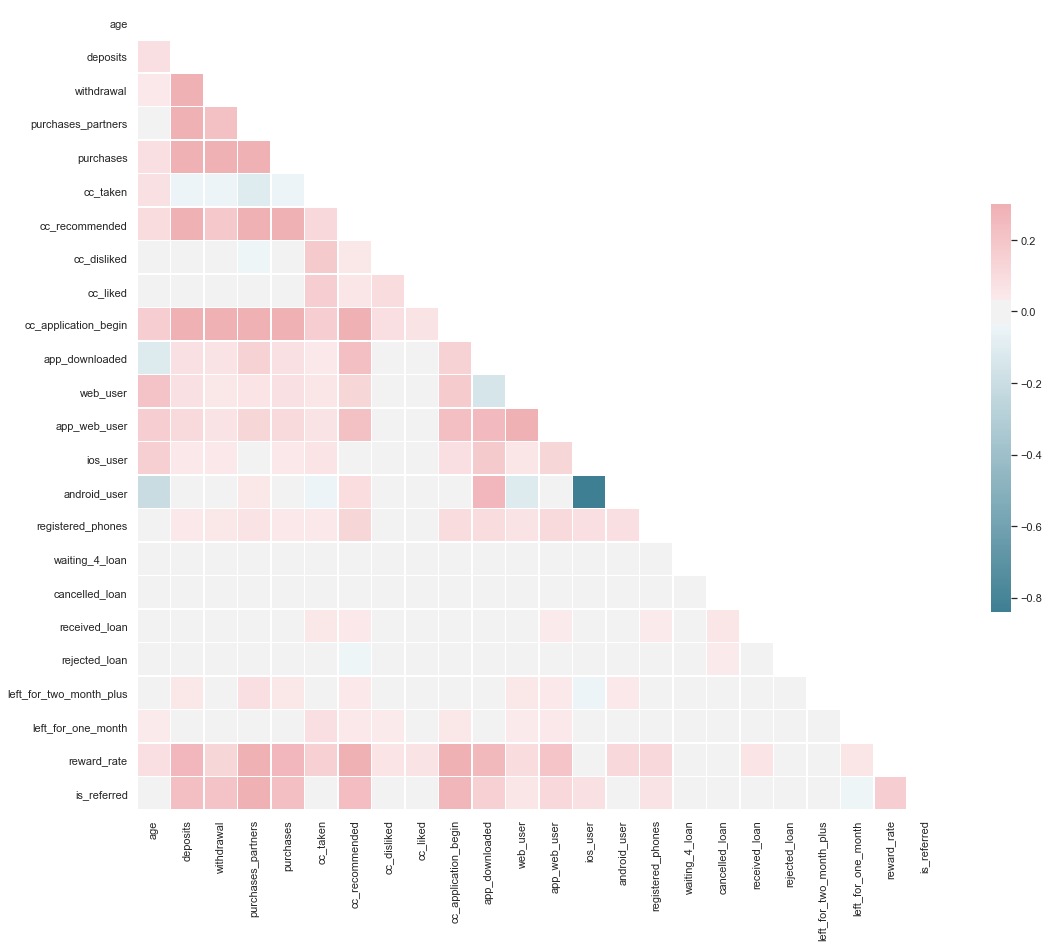

In [20]:
# Correlation matrix

sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [21]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

#### Note: Although there are somewhat correlated fields, they are not colinear. These feature are not functions of each other, so they won't break the model. But these feature won't help much either. Feature Selection should remove them.

In [22]:
dataset.to_csv('E:/Machine_Learning/Minimizing_Churn_rates_Through_Analysis_of_Financial_Habits/Minimizing-Churn-Data/new_churn_data_s.csv', index = False)